# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#adding in additional dependencies
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# pip install citypy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# url call - use a city to figure out the json structure for the data
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}units={units}&appid={weather_api_key}&q="

# Get weather data
# #f"{base_url}appid={weather_api_key}&units={units}&q"
# Look at the json to figure out the structure of data
# response = requests.get(query_url).json()
# pprint(response)

# # create lists of all the data elements
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []

# # for loop through the data
for city in cities:
    response = requests.get(query_url + city).json()
    
    # try and except clause while appending the data
    try:
        city_id.append(response['id'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City Name: {city_name}, City ID: {city_id}")
    except:
        print(f"That record for {city_name} doesn't not exsist. ")
    
    



City Name: ['Bethel'], City ID: [5282297]
City Name: ['Bethel', 'Lufilufi'], City ID: [5282297, 4035249]
City Name: ['Bethel', 'Lufilufi', 'Khanbari'], City ID: [5282297, 4035249, 1283217]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime'], City ID: [5282297, 4035249, 1283217, 3906765]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa'

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla'] doesn't not exsist. 
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964, 2012530, 3374210, 3833367, 6167817, 4030556, 935215, 2127515, 5563397, 1735106, 8079926, 3366880, 2075265, 5848280, 1259385, 6164831, 2126710, 2194098, 3372707, 2596934, 1626493]
City Name: ['Bethel',

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964, 2012530, 3374210, 3833367, 6167817, 4030556, 935215, 2127515, 5563397, 1735106, 8079926, 3366880, 2075265, 5848280, 1259385, 6164831, 2126710, 2194098, 3372707, 2596934, 1626493, 2445704, 2429344, 3356832, 6170031, 1819729, 6185377, 3874787, 3421719, 1489962, 4034551, 934322]
City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea'

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964, 2012530, 3374210, 3833367, 6167817, 4030556, 935215, 2127515, 5563397, 1735106, 8079926, 3366880, 2075265, 5848280, 1259385, 6164831, 2126710, 2194098, 3372707, 2596934, 1626493, 2445704, 2429344, 3356832, 6170031, 1819729, 6185377, 3874787, 3421719, 1489962, 4034551, 934322, 3868633, 935214, 185

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964, 2012530, 3374210, 3833367, 6167817, 4030556, 935215, 2127515, 5563397, 1735106, 8079926, 3366880, 2075265, 5848280, 1259385, 6164831, 2126710, 2194098, 3372707, 2596934, 16264

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964, 2012530, 3374210, 3833367, 6167817, 4030556, 935215, 2127515, 5563397, 1735106, 8079926, 33

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan'], City ID: [5282297, 4035249, 1283217, 3906765, 3369157, 2092164, 2206939, 3372964, 2012530, 3374210,

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui'], City ID: [5282297,

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

That record for ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Ch

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

City Name: ['Bethel', 'Lufilufi', 'Khanbari', 'Quime', 'Cape Town', 'Lorengau', 'Bluff', 'Lagoa', 'Zhigansk', 'São Filipe', 'Ushuaia', 'Torbay', 'Rikitea', 'Saint-Philippe', 'Wakkanai', 'Eureka', 'George Town', 'Labuhan', 'Hermanus', 'Busselton', 'Kapaa', 'Port Blair', 'Thessalon', 'Beringovskiy', 'Ahipara', 'Ribeira Grande', 'Séguéla', 'Srandakan', 'Diffa', 'Kyabé', 'Henties Bay', 'Tuktoyaktuk', 'Hong Kong', 'Yellowknife', 'Punta Arenas', 'Narsaq', 'Tavda', 'Faanui', 'Mahébourg', 'Vallenar', 'Saint-Pierre', 'Nishihara', 'Hithadhoo', 'Puerto Ayora', 'Bandarbeyla', 'Nerchinskiy Zavod', 'Moose Factory', 'Te Anau', 'San Patricio', 'Farafangana', 'Cherskiy', 'São Gabriel da Cachoeira', 'Souillac', 'Saint Paul Harbor', 'Hilo', 'Abalak', 'Waddān', 'Castro', 'Hobart', 'Necochea', 'Chimaltenango', 'Port Alfred', 'Aplaya', 'Resplendor', 'Kahului', 'East London', 'Rome', 'Tasiilaq', 'Baijiantan', 'Atuona', 'Trairi', 'Kuching', 'Saskylakh', 'Portoferraio', 'Geraldton', 'Chui', 'Yakeshi', 'Chokurd

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a DataFrame
city_weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "lng": lng,
    "Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

city_weather_df

,City,Lat,lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,89.35,61,40,1.99,US,1626465896
1,Lufilufi,-13.8745,-171.5986,81.32,78,33,23.55,WS,1626465727
2,Khanbari,27.3747,87.2039,73.31,94,100,0.87,NP,1626465896
3,Quime,-16.9833,-67.2167,61.84,43,3,5.95,BO,1626465897
4,Cape Town,-33.9258,18.4232,49.95,95,0,4.76,ZA,1626465620
...,...,...,...,...,...,...,...,...,...
557,Msanga,-6.0500,36.0333,65.86,49,39,6.60,TZ,1626466127
558,Verkhoyansk,67.5447,133.3850,63.03,47,100,3.22,RU,1626466127
559,La Paz,-16.5000,-68.1500,57.51,29,1,10.36,BO,1626465865
560,Wadi Maliz,36.4681,8.5495,70.43,73,0,4.90,TN,1626466128


In [8]:
# export csv to file
city_weather_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Look for the high humidity value
city_weather_df.describe()

,Lat,lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.549687,21.271565,69.755730,68.879004,53.471530,7.772509,1.626466e+09
std,33.455877,88.140398,13.656144,21.880154,40.594338,5.903389,1.067096e+02
min,-54.800000,-175.200000,30.180000,9.000000,0.000000,0.000000,1.626465e+09
25%,-6.872475,-52.857850,59.402500,56.000000,8.000000,3.440000,1.626466e+09
50%,25.609900,24.398750,71.765000,74.000000,57.500000,5.990000,1.626466e+09
75%,47.616625,95.322000,79.607500,86.000000,98.000000,10.747500,1.626466e+09
max,78.218600,179.316700,106.590000,100.000000,100.000000,34.310000,1.626466e+09


In [15]:
#  Get the indices of cities that have humidity over 100%.
sample_humidity = city_weather_df[city_weather_df['Humidity'] > 100]
sample_humidity.index

Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data"
clean_city_data = city_weather_df.drop(sample_humidity.index, inplace=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

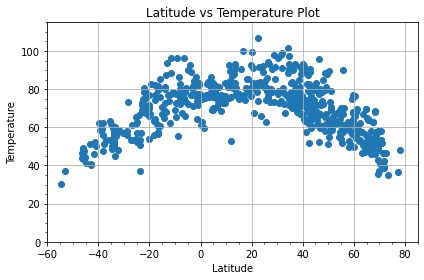

In [17]:
# scatter plot for Latitude vs Temperature Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Temp']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.ylim(0, 115)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

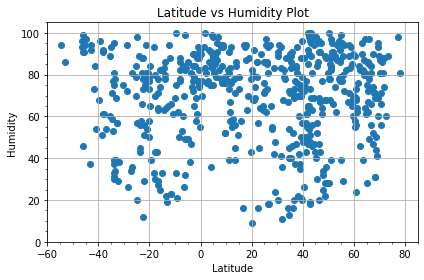

In [18]:
# scatter plot for Latitude vs Humidity Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0, 105)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

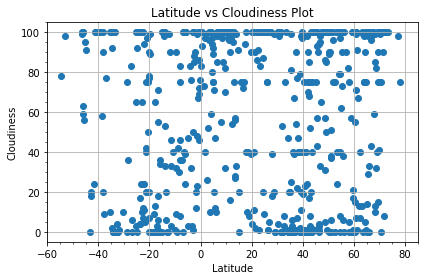

In [19]:
# scatter plot for Latitude vs Cloudiness Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 105)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

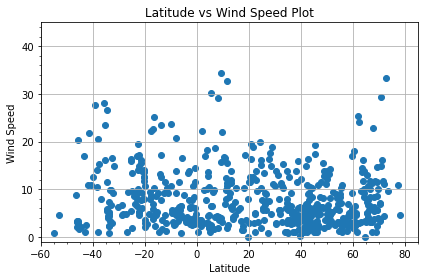

In [20]:
# scatter plot for Latitude vs Humidity Plot
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']

plt.scatter(x_values, y_values)
plt.title('Latitude vs Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(-1, 45)
plt.xlim(-60, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()

## Linear Regression

In [21]:
# check the northern list
north_weather = city_weather_df[city_weather_df['Lat'] >= 0]
north_weather

,City,Lat,lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,89.35,61,40,1.99,US,1626465896
2,Khanbari,27.3747,87.2039,73.31,94,100,0.87,NP,1626465896
7,Lagoa,39.0500,-27.9833,66.96,73,2,16.04,PT,1626465898
8,Zhigansk,66.7697,123.3711,57.96,56,43,11.77,RU,1626465898
9,São Filipe,14.8961,-24.4956,74.73,79,0,7.25,CV,1626465899
...,...,...,...,...,...,...,...,...,...
555,Eyrarbakki,63.8630,-21.1481,50.20,80,98,11.77,IS,1626466126
556,Tura,25.5198,90.2201,74.14,97,100,5.68,IN,1626466126
558,Verkhoyansk,67.5447,133.3850,63.03,47,100,3.22,RU,1626466127
560,Wadi Maliz,36.4681,8.5495,70.43,73,0,4.90,TN,1626466128


In [22]:
# check the southern list - add up northern list and southern list to validate I have all 573 from above
south_weather = city_weather_df[city_weather_df['Lat'] < 0]
south_weather

,City,Lat,lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Lufilufi,-13.8745,-171.5986,81.32,78,33,23.55,WS,1626465727
3,Quime,-16.9833,-67.2167,61.84,43,3,5.95,BO,1626465897
4,Cape Town,-33.9258,18.4232,49.95,95,0,4.76,ZA,1626465620
5,Lorengau,-2.0226,147.2712,81.55,84,90,7.74,PG,1626465897
6,Bluff,-46.6000,168.3333,43.81,93,99,8.72,NZ,1626465670
...,...,...,...,...,...,...,...,...,...
551,Arinos,-15.9169,-46.1056,85.21,25,0,2.24,BR,1626466124
552,Port Hedland,-20.3167,118.5667,53.65,50,7,8.05,AU,1626466125
553,San Isidro,-12.1167,-77.0500,62.46,88,90,11.50,PE,1626466125
557,Msanga,-6.0500,36.0333,65.86,49,39,6.60,TZ,1626466127


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.44x +88.37
The r-value is: 0.4303917533320722


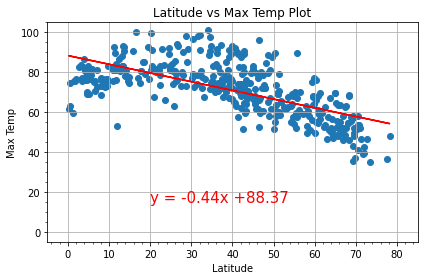

In [23]:
x_values = north_weather['Lat']
y_values = north_weather['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Max Temp Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(-5, 105)
plt.xlim(-5, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.81x +83.37
The r-value is: 0.6510369335564823


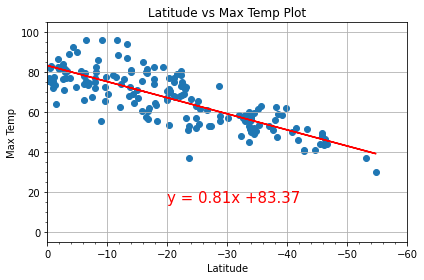

In [24]:
x_values = south_weather['Lat']
y_values = south_weather['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Max Temp Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.07x +72.57
The r-value is: 0.003919944989863327


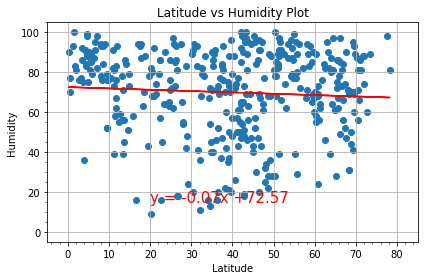

In [25]:
x_values = north_weather['Lat']
y_values = north_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Humidity Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(-5, 105)
plt.xlim(-5, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.07x +65.17
The r-value is: 0.0016408354219581913


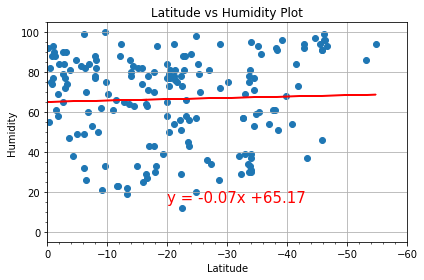

In [26]:
x_values = south_weather['Lat']
y_values = south_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Humidity Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.19x +64.03
The r-value is: 0.008783138430129478


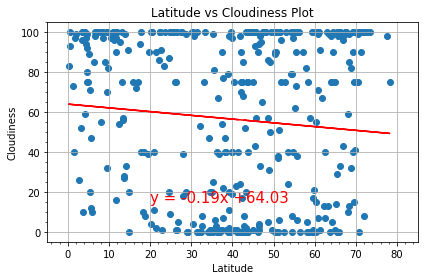

In [27]:
x_values = north_weather['Lat']
y_values = north_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Cloudiness Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 105)
plt.xlim(-5, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.07x +47.96
The r-value is: 0.0005390664253683741


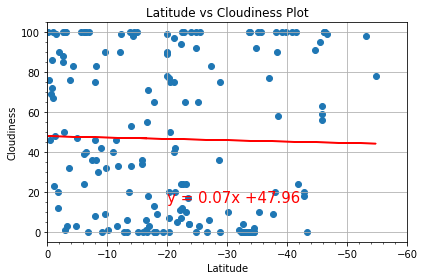

In [28]:
x_values = south_weather['Lat']
y_values = south_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Cloudiness Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +8.16
The r-value is: 0.004780359380301915


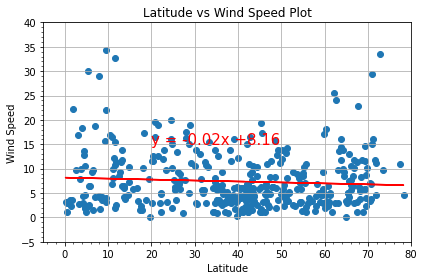

In [29]:
x_values = north_weather['Lat']
y_values = north_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Wind Speed Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(-5, 40)
plt.xlim(-5, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.05x +7.66
The r-value is: 0.010340730972038645


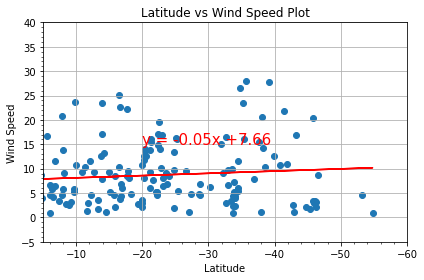

In [30]:
x_values = south_weather['Lat']
y_values = south_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.title('Latitude vs Wind Speed Plot')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(-5, 40)
plt.xlim(-5, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()

# Print r square value
print(f"The r-value is: {rvalue**2}")

plt.show()